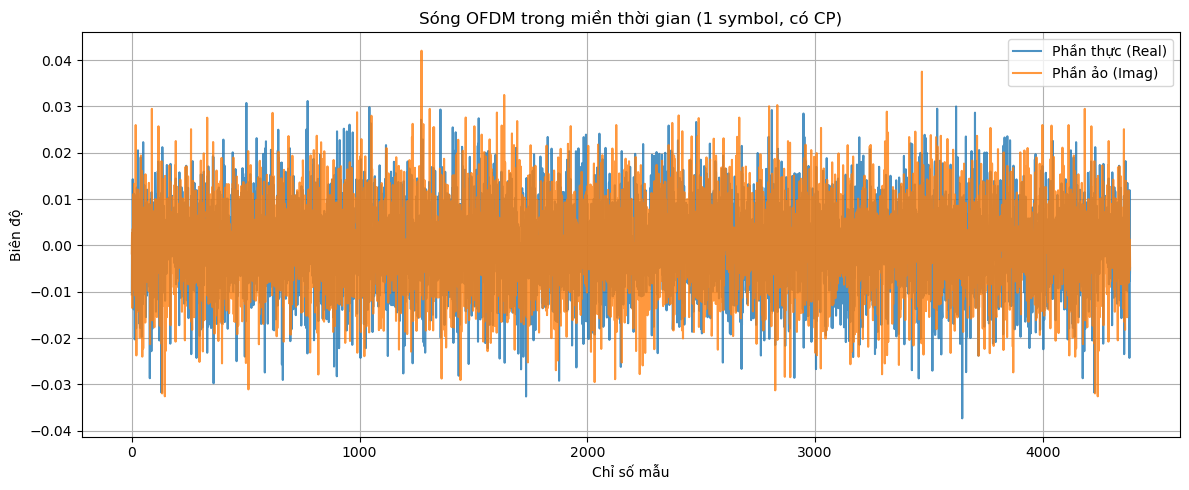

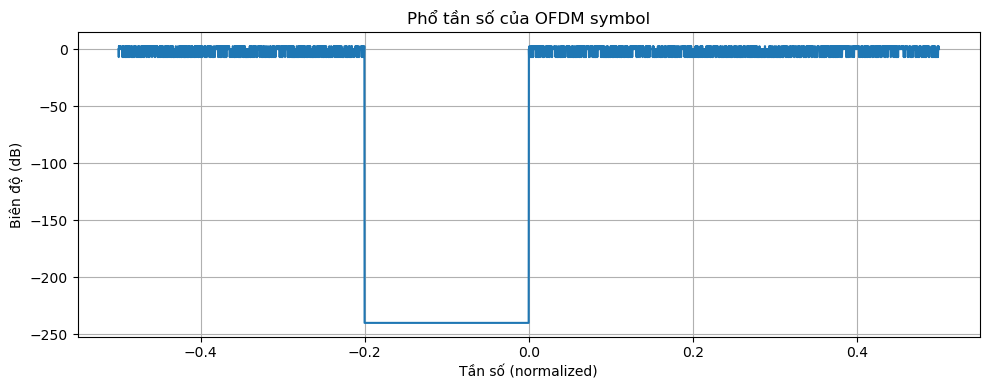

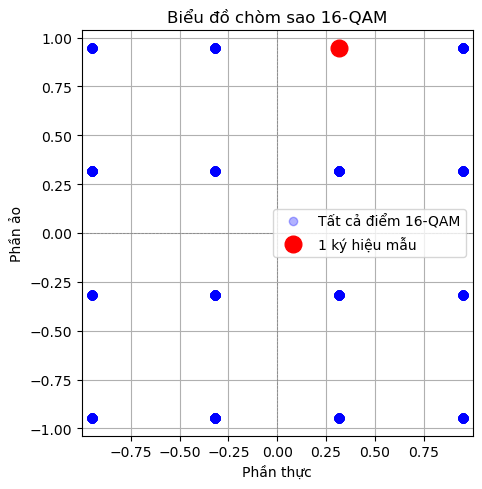

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Tham số ---
num_subcarriers = 3276
fft_size = 4096
cp_len = 288

# --- Điều chế 16-QAM ---
def qam16_mod(bits):
    mapping = {
        (0,0,0,0): -3-3j, (0,0,0,1): -3-1j, (0,0,1,1): -3+1j, (0,0,1,0): -3+3j,
        (0,1,0,0): -1-3j, (0,1,0,1): -1-1j, (0,1,1,1): -1+1j, (0,1,1,0): -1+3j,
        (1,1,0,0):  1-3j, (1,1,0,1):  1-1j, (1,1,1,1):  1+1j, (1,1,1,0):  1+3j,
        (1,0,0,0):  3-3j, (1,0,0,1):  3-1j, (1,0,1,1):  3+1j, (1,0,1,0):  3+3j
    }
    bits = bits.reshape(-1, 4)
    return np.array([mapping[tuple(b)] for b in bits]) / np.sqrt(10)

# --- Sinh dữ liệu ngẫu nhiên ---
num_bits = num_subcarriers * 4
bits = np.random.randint(0, 2, num_bits)
symbols_16qam = qam16_mod(bits)

# --- Lưu 1 ký hiệu 16-QAM để vẽ riêng ---
sample_symbol = symbols_16qam[0]

# --- Ánh xạ tần số ---
freq_domain = np.zeros(fft_size, dtype=complex)
freq_domain[:num_subcarriers] = symbols_16qam

# --- IFFT để chuyển sang miền thời gian ---
time_domain = np.fft.ifft(freq_domain)

# --- Thêm Cyclic Prefix ---
cp = time_domain[-cp_len:]
ofdm_with_cp = np.concatenate([cp, time_domain])

# --- VẼ 1: Biểu đồ sóng OFDM (time domain) ---
plt.figure(figsize=(12, 5))
plt.plot(np.real(ofdm_with_cp), label='Phần thực (Real)', alpha=0.8)
plt.plot(np.imag(ofdm_with_cp), label='Phần ảo (Imag)', alpha=0.8)
plt.title("Sóng OFDM trong miền thời gian (1 symbol, có CP)")
plt.xlabel("Chỉ số mẫu")
plt.ylabel("Biên độ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# --- Tính phổ tần số ---
# Bỏ CP để phân tích FFT đúng
ofdm_no_cp = ofdm_with_cp[cp_len:]

# Dùng FFT để lấy phổ
spectrum = np.fft.fft(ofdm_no_cp)
spectrum_shifted = np.fft.fftshift(spectrum)  # Dịch zero tần về giữa
freq_axis = np.fft.fftshift(np.fft.fftfreq(len(ofdm_no_cp), d=1))

# --- Vẽ phổ ---
plt.figure(figsize=(10, 4))
plt.plot(freq_axis, 20*np.log10(np.abs(spectrum_shifted) + 1e-12))  # Dạng dB
plt.title("Phổ tần số của OFDM symbol")
plt.xlabel("Tần số (normalized)")
plt.ylabel("Biên độ (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- VẼ 2: 1 ký hiệu 16-QAM trên mặt phẳng phức ---
plt.figure(figsize=(5,5))
plt.plot(np.real(symbols_16qam), np.imag(symbols_16qam), 'bo', alpha=0.3, label='Tất cả điểm 16-QAM')
plt.plot(np.real(sample_symbol), np.imag(sample_symbol), 'ro', markersize=12, label='1 ký hiệu mẫu')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.title("Biểu đồ chòm sao 16-QAM")
plt.xlabel("Phần thực")
plt.ylabel("Phần ảo")
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()
